### Задание 1. Работа с реальными данными (20 баллов)

In [1]:
path_bed  = './alignment.bed'
path_gff = './rrna_annotation.gff'

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
colnames_gff = ['seqid', 'source', 'type', 'start', 'end', 'score', 'strand', 'phase', 'attributes']
colnames_bed = ["chrom", "chromStart", "chromEnd", "name", "score", "strand"]

In [4]:
alignment_bed = pd.read_csv(path_bed, sep = "\t", names = colnames_bed)

In [5]:
alignment_bed.head()

,chrom,chromStart,chromEnd,name,score,strand
0,Reference_1,197681,200286,NODE_1445_length_2603_cov_1135.593799,41,-
1,Reference_1,202886,202996,NODE_19543_length_110_cov_1549.290909,0,-
2,Reference_1,202941,203377,NODE_5666_length_436_cov_418.653543,16,+
3,Reference_1,203322,785222,NODE_25_length_581906_cov_146.024228,60,+
4,Reference_1,785169,1763981,NODE_11_length_978812_cov_132.517515,60,-


In [6]:
gff = pd.read_csv(path_gff, sep = "\t", skiprows=1, names = colnames_gff)

In [7]:
def search_RNA(string):
    res = re.findall('\d{1,2}S', string)
    return res[0]


In [8]:
gff.attributes = gff.attributes.map(lambda p: search_RNA(p))

In [9]:
gff.groupby(["seqid"]).attributes.apply(lambda x: x)

0      16S
1      23S
2      16S
3      23S
4      23S
      ... 
343    23S
344     5S
345     5S
346    23S
347    16S
Name: attributes, Length: 348, dtype: object

In [10]:
gff

,seqid,source,type,start,end,score,strand,phase,attributes
0,Reference_10,barrnap:0.9,rRNA,67122,68652,0.000000e+00,+,.,16S
1,Reference_10,barrnap:0.9,rRNA,68981,72061,0.000000e+00,+,.,23S
2,Reference_10,barrnap:0.9,rRNA,469298,470826,0.000000e+00,+,.,16S
3,Reference_10,barrnap:0.9,rRNA,471166,474246,0.000000e+00,+,.,23S
4,Reference_10,barrnap:0.9,rRNA,3629599,3632680,0.000000e+00,-,.,23S
...,...,...,...,...,...,...,...,...,...
343,Reference_25,barrnap:0.9,rRNA,1819878,1822785,0.000000e+00,+,.,23S
344,Reference_25,barrnap:0.9,rRNA,1822913,1823016,2.900000e-10,+,.,5S
345,Reference_25,barrnap:0.9,rRNA,3744056,3744159,2.900000e-10,-,.,5S
346,Reference_25,barrnap:0.9,rRNA,3744287,3747194,0.000000e+00,-,.,23S


In [11]:
gff.shape

(348, 9)

In [12]:
gff["counter"] = pd.Series([0] * 348)

In [13]:
gff

,seqid,source,type,start,end,score,strand,phase,attributes,counter
0,Reference_10,barrnap:0.9,rRNA,67122,68652,0.000000e+00,+,.,16S,0
1,Reference_10,barrnap:0.9,rRNA,68981,72061,0.000000e+00,+,.,23S,0
2,Reference_10,barrnap:0.9,rRNA,469298,470826,0.000000e+00,+,.,16S,0
3,Reference_10,barrnap:0.9,rRNA,471166,474246,0.000000e+00,+,.,23S,0
4,Reference_10,barrnap:0.9,rRNA,3629599,3632680,0.000000e+00,-,.,23S,0
...,...,...,...,...,...,...,...,...,...,...
343,Reference_25,barrnap:0.9,rRNA,1819878,1822785,0.000000e+00,+,.,23S,0
344,Reference_25,barrnap:0.9,rRNA,1822913,1823016,2.900000e-10,+,.,5S,0
345,Reference_25,barrnap:0.9,rRNA,3744056,3744159,2.900000e-10,-,.,5S,0
346,Reference_25,barrnap:0.9,rRNA,3744287,3747194,0.000000e+00,-,.,23S,0


In [14]:
count_rna = gff.groupby(["seqid", "attributes"]).counter.apply(lambda x: x.count())   # немного некрасиво работает метод, но инфу получил

In [15]:
type(count_rna.index)   # мультииндекс
count_rna = count_rna.to_dict()

In [16]:
check = {"16S": "5S", "23S": "16S", "5S":"23S"}
all_rna = []
ref = []
value = []
for key in count_rna:
    all_rna.append(key[1])
    ref.append(key[0])
    value.append(count_rna[key])



In [17]:
rna = ["5S", "16S", "23S"]
all_comb = []
for i in ref:
    for k in rna:
        all_comb.append((i, k))



In [18]:
rest = set(all_comb) - set(count_rna.keys())

In [19]:
rest = list(rest)

In [20]:
rest

[('Reference_10', '5S'), ('Reference_8', '5S')]

In [21]:
count_rna[rest[0]] = 0
count_rna[rest[1]] = 0

In [22]:
ref = []
for key in count_rna:
    ref.append(key[0])


In [23]:
new_ref = {}
for i in set(ref):
    new_ref[i] = {}
    for key in count_rna:
        if key[0] == i:
            new_ref[i][key[1]] = count_rna[key]


In [24]:
new_ref

{'Reference_22': {'16S': 4, '23S': 4, '5S': 4},
 'Reference_13': {'16S': 4, '23S': 4, '5S': 4},
 'Reference_26': {'16S': 4, '23S': 4, '5S': 4},
 'Reference_19': {'16S': 7, '23S': 7, '5S': 8},
 'Reference_12': {'16S': 2, '23S': 2, '5S': 2},
 'Reference_2': {'16S': 5, '23S': 5, '5S': 5},
 'Reference_5': {'16S': 6, '23S': 6, '5S': 6},
 'Reference_6': {'16S': 2, '23S': 2, '5S': 2},
 'Reference_21': {'16S': 1, '23S': 1, '5S': 1},
 'Reference_23': {'16S': 1, '23S': 1, '5S': 1},
 'Reference_7': {'16S': 9, '23S': 8, '5S': 8},
 'Reference_24': {'16S': 4, '23S': 4, '5S': 4},
 'Reference_14': {'16S': 4, '23S': 4, '5S': 5},
 'Reference_17': {'16S': 7, '23S': 7, '5S': 8},
 'Reference_1': {'16S': 2, '23S': 2, '5S': 2},
 'Reference_8': {'16S': 2, '23S': 2, '5S': 0},
 'Reference_11': {'16S': 2, '23S': 2, '5S': 2},
 'Reference_15': {'16S': 8, '23S': 8, '5S': 8},
 'Reference_10': {'16S': 5, '23S': 5, '5S': 0},
 'Reference_9': {'16S': 6, '23S': 6, '5S': 6},
 'Reference_18': {'16S': 2, '23S': 3, '5S': 2},

In [25]:
rna_5S = []
rna_23S = []
rna_16S = []
for key in new_ref:
    rna_5S.append(new_ref[key]['5S'])
    rna_23S.append(new_ref[key]['23S'])
    rna_16S.append(new_ref[key]['16S'])


In [26]:
len(rna_23S) == len(rna_23S) == len(rna_16S)

True

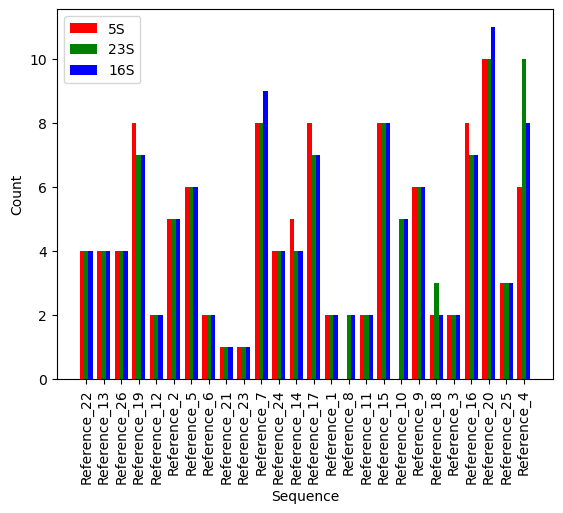

In [27]:

N = len(rna_23S)
ind = np.arange(N)
width = 0.25

xvals = rna_5S
bar1 = plt.bar(ind, xvals, width, color = 'r')

yvals = rna_23S
bar2 = plt.bar(ind+width, yvals, width, color='g')

zvals = rna_16S
bar3 = plt.bar(ind+width*2, zvals, width, color = 'b')

plt.xlabel("Sequence")
plt.ylabel('Count')

plt.xticks(ind+width, list(new_ref.keys()), rotation='vertical')
plt.legend( (bar1, bar2, bar3), ('5S', '23S', '16S') )
plt.show()




In [28]:
gff.drop("counter", axis=1, inplace=True)

In [53]:
any(gff.duplicated())   # нет дубликатов

False

In [30]:
alignment_bed = alignment_bed.rename(columns = {"chrom": "seqid"})

In [31]:
alignment_bed

,seqid,chromStart,chromEnd,name,score,strand
0,Reference_1,197681,200286,NODE_1445_length_2603_cov_1135.593799,41,-
1,Reference_1,202886,202996,NODE_19543_length_110_cov_1549.290909,0,-
2,Reference_1,202941,203377,NODE_5666_length_436_cov_418.653543,16,+
3,Reference_1,203322,785222,NODE_25_length_581906_cov_146.024228,60,+
4,Reference_1,785169,1763981,NODE_11_length_978812_cov_132.517515,60,-
...,...,...,...,...,...,...
7705,Reference_26,5532432,5535601,NODE_1329_length_3169_cov_103.935132,5,+
7706,Reference_26,5535546,5535722,NODE_19238_length_176_cov_67.305785,0,+
7707,Reference_26,5535667,5537226,NODE_2001_length_1559_cov_98.029920,0,+
7708,Reference_26,5537171,5537343,NODE_19245_length_172_cov_84.367521,0,+


In [32]:
df = pd.merge(gff, alignment_bed, on='seqid')   # объединяем по совпадениям референсных геномов, иначе точно не совпадают, далее будем считать границу

In [33]:
idx = np.where((df.chromEnd >= df.end) & (df.chromStart <= df.start)) #считаю границу, берем индексы прошедших условие
idx = idx[0].tolist()
df = df.iloc[idx]

In [34]:
df = df.drop(df.columns[[-1, -2]], axis = 1)

In [38]:
df.head() #итогове пересечение контигов на сборку

,seqid,source,type,start,end,score_x,strand_x,phase,attributes,chromStart,chromEnd,name
129,Reference_11,barrnap:0.9,rRNA,924358,925855,0.000000e+00,+,.,16S,923529,930070,NODE_1081_length_6540_cov_836.773323
156,Reference_11,barrnap:0.9,rRNA,926697,929642,0.000000e+00,+,.,23S,923529,930070,NODE_1081_length_6540_cov_836.773323
183,Reference_11,barrnap:0.9,rRNA,929827,929936,1.400000e-12,+,.,5S,923529,930070,NODE_1081_length_6540_cov_836.773323
215,Reference_11,barrnap:0.9,rRNA,2074460,2075957,0.000000e+00,+,.,16S,2073631,2080172,NODE_1081_length_6540_cov_836.773323
242,Reference_11,barrnap:0.9,rRNA,2076799,2079744,0.000000e+00,+,.,23S,2073631,2080172,NODE_1081_length_6540_cov_836.773323


### Задание 2. Кастомизация графиков

In [39]:
!ls

Air_Traffic_Passenger_Statistics.csv  owid-covid-data.csv  requirements.txt
alignment.bed			      pandas_visual.ipynb  rrna_annotation.gff
archive.zip			      pandas_visual.py
diffexpr_data.tsv		      README.md


In [48]:
data = pd.read_csv('./diffexpr_data.tsv', sep = '\t')

In [51]:
data.columns

Index(['Sample', 'logFC', 'pval', 'pval_corr', 'log_pval'], dtype='object')

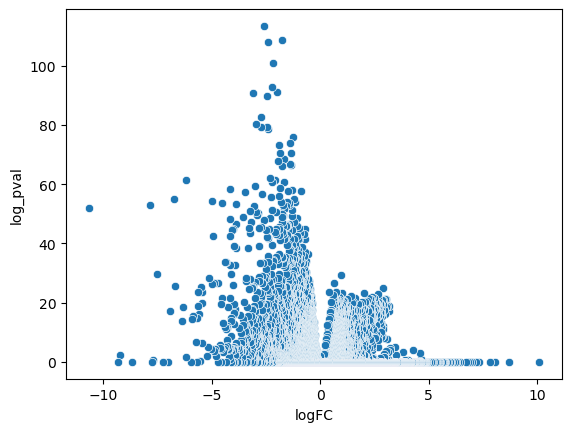

In [56]:
plt.plot(figsize = (9, 10))
ax = sns.scatterplot(data = data, x = 'logFC', y = 'log_pval')

#### Pie chart (Доп)

In [210]:
data_pie = pd.read_csv("Air_Traffic_Passenger_Statistics.csv")

In [211]:
idx = np.where(data_pie["Published Airline"].value_counts() >= 100)[0].tolist()

In [212]:
slice = data_pie["Published Airline"].iloc[idx].value_counts()
labels = data_pie["Published Airline"].iloc[idx].value_counts().index

In [213]:
explode = [0] * len(labels)
explode[0] = 0.1

In [214]:
explode

[0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [215]:
data_pie[data_pie["Published Airline"] == "Alaska Airlines"]["GEO Region"].value_counts().tolist()

[560, 300, 109]

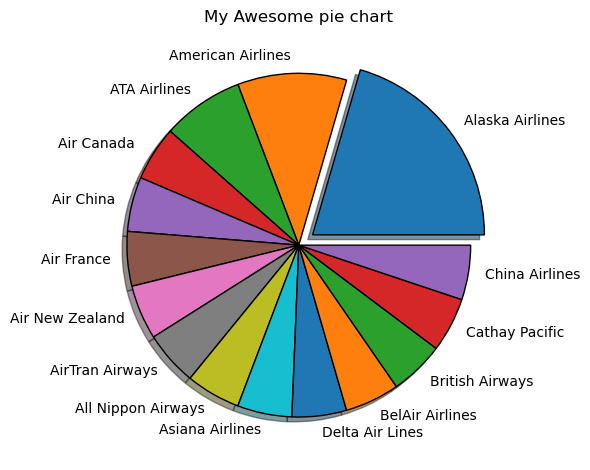

In [218]:
plt.pie(slice, labels = labels, explode = explode, wedgeprops= {"edgecolor": "black"}, shadow = True)
plt.title("My Awesome pie chart")
plt.tight_layout()
plt.show()



In [221]:
geo = data_pie[data_pie["Published Airline"] == "Alaska Airlines"]["GEO Region"].value_counts().tolist()

In [225]:
data_pie[data_pie["Published Airline"] == "Alaska Airlines"]["GEO Region"].value_counts()

US        560
Mexico    300
Canada    109
Name: GEO Region, dtype: int64

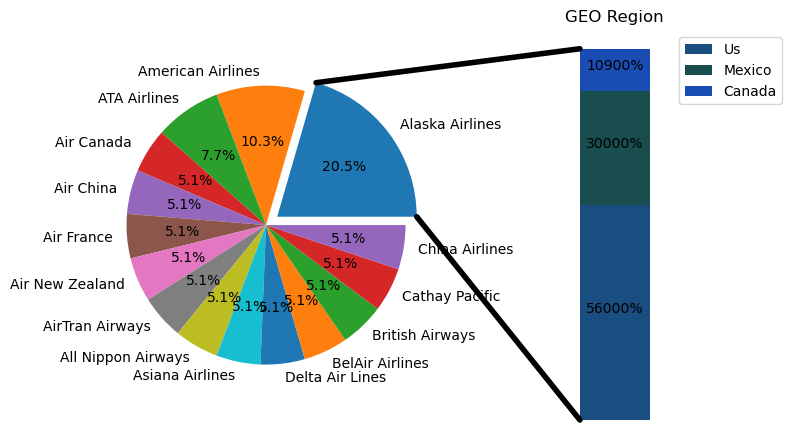

In [234]:
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import numpy as np

# make figure and assign axis objects
fig = plt.figure(figsize=(9, 5.0625))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
fig.subplots_adjust(wspace=0)

# pie chart parameters
slice = data_pie["Published Airline"].iloc[idx].value_counts()
labels = data_pie["Published Airline"].iloc[idx].value_counts().index
explode = [0] * len(labels)
explode[0] = 0.1
# rotate so that first wedge is split by the x-axis
angle = -180 * slice[0]
ax1.pie(slice, autopct='%1.1f%%', startangle=angle,
        labels=labels, explode=explode)

# bar chart parameters

xpos = 0
bottom = 0
geo = data_pie[data_pie["Published Airline"] == "Alaska Airlines"]["GEO Region"].value_counts().tolist()
width = .2
colors = [[.1, .3, .5], [.1, .3, .3], [.1, .3, .7]]

for j in range(len(geo)):
    height = geo[j]
    ax2.bar(xpos, height, width, bottom=bottom, color=colors[j])
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    ax2.text(xpos, ypos, "%d%%" % (ax2.patches[j].get_height() * 100),
             ha='center')

ax2.set_title('GEO Region')
ax2.legend(('Us', 'Mexico', 'Canada'))
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
# get the wedge data
theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
center, r = ax1.patches[0].center, ax1.patches[0].r
bar_height = sum([item.get_height() for item in ax2.patches])

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(- width / 2, bar_height), xyB=(x, y),
                      coordsA="data", coordsB="data", axesA=ax2, axesB=ax1)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)


x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(- width / 2, 0), xyB=(x, y), coordsA="data",
                      coordsB="data", axesA=ax2, axesB=ax1)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

plt.show();


# Eda

In [173]:
covid = pd.read_csv("./owid-covid-data.csv")

In [174]:
import numpy as np

In [175]:
covid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2/24/2020,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2/25/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2/26/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2/27/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2/28/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [5]:
# NAN = pd.DataFrame(NAN, columns=["column_name", "percentage"])
# NAN

In [6]:
#посмотрим total deaths по странам

In [7]:
labels = covid.groupby(["continent"]).total_deaths.agg(["count"]).index
slice = covid.groupby(["continent"]).total_deaths.agg(["count"])["count"].tolist()

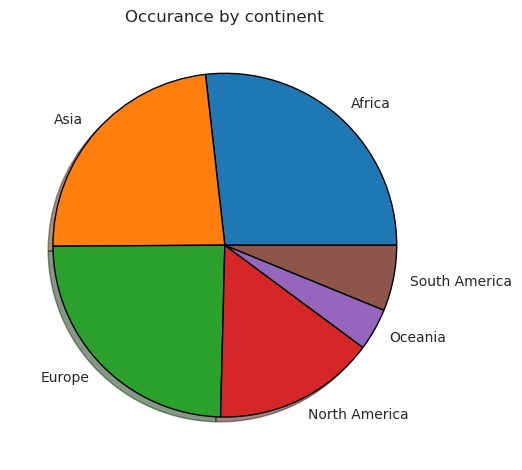

In [8]:
plt.pie(slice, labels = labels, wedgeprops= {"edgecolor": "black"}, shadow = True)
plt.title("Occurance by continent")
plt.tight_layout()
plt.show()

##### далее посмотрим на распределение смертей по самым большим сегментам - Европы и Африки

In [9]:
Europe = covid.query("continent == 'Europe'")
labels = Europe.groupby(["location"]).total_deaths.agg(["count"]).index
counter = Europe.groupby(["location"]).total_deaths.agg(["count"])["count"].tolist()

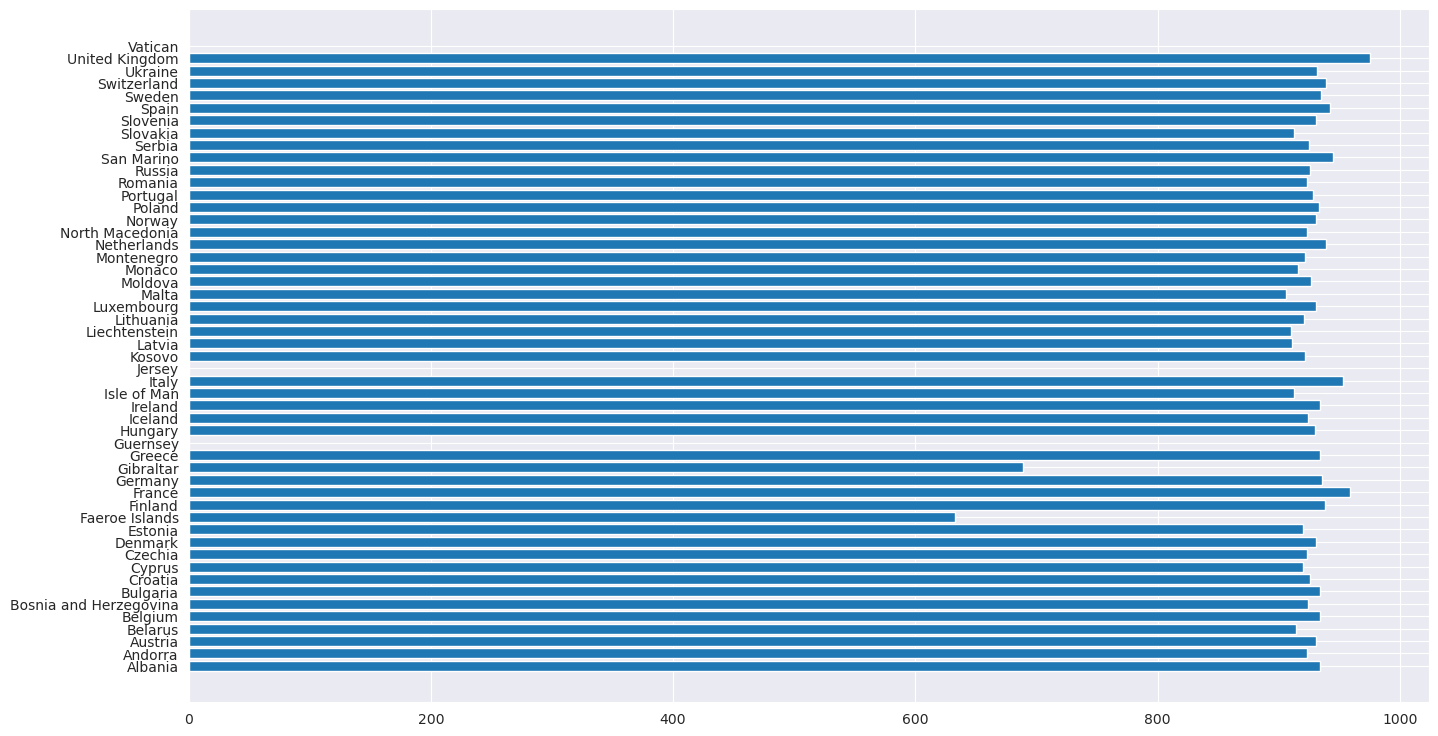

In [10]:
fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(labels, counter);

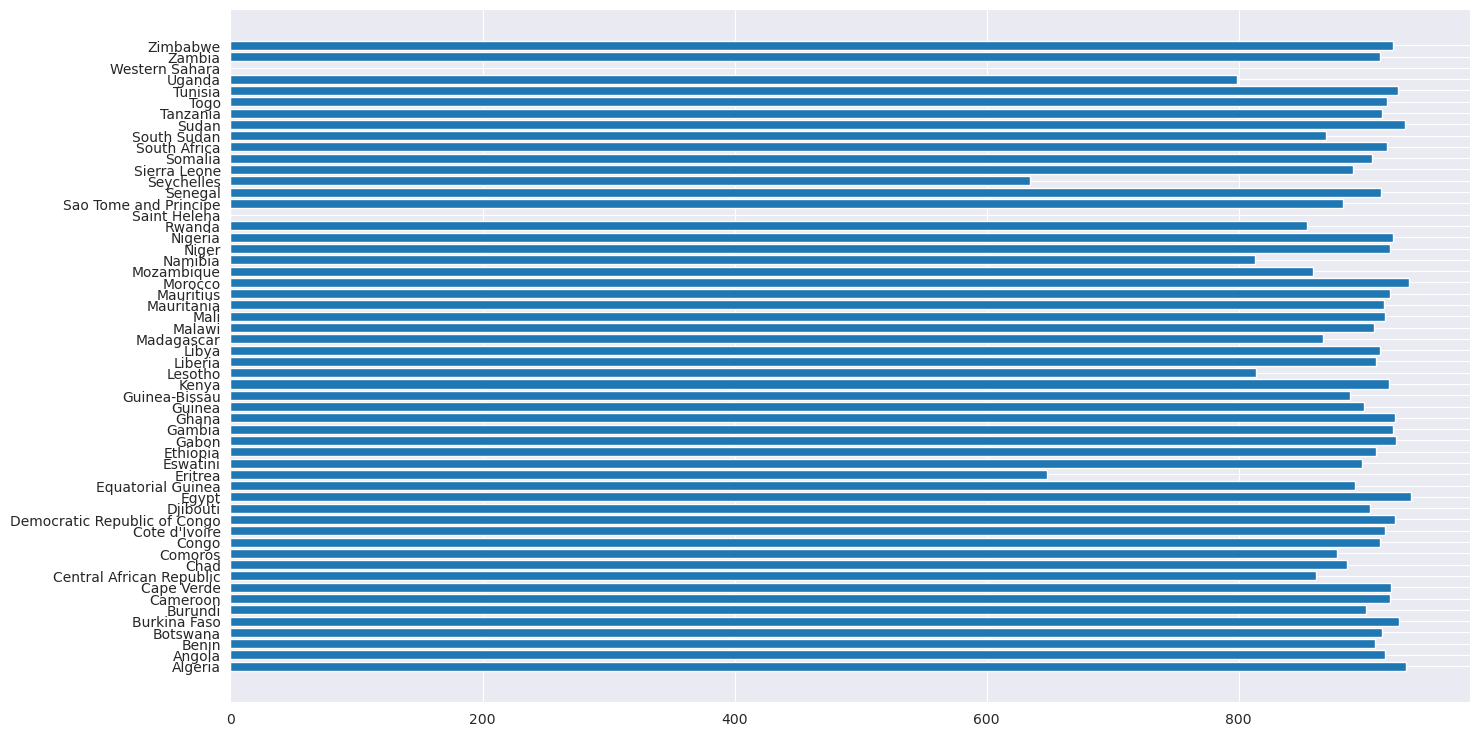

In [11]:
Africa = covid.query("continent == 'Africa'")
labels = Africa.groupby(["location"]).total_deaths.agg(["count"]).index
counter = Africa.groupby(["location"]).total_deaths.agg(["count"])["count"].tolist()
fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(labels, counter);

Распределение больше похоже к равномерному

In [12]:
covid.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

### посмотрим как (анти)коррелируют общее число вакцинировавших и число новых случаев заболевания

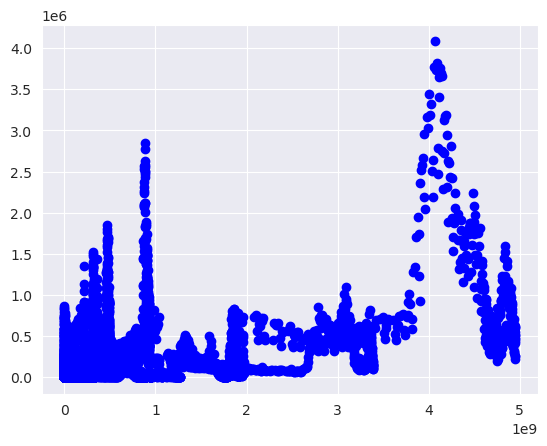

In [19]:
vacc = covid.people_fully_vaccinated[covid.people_fully_vaccinated.notna() == True].sort_values()
new_case = covid.new_cases.iloc[vacc.index]
plt.scatter(vacc, new_case, c ="blue")
plt.show()

In [20]:
covid.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

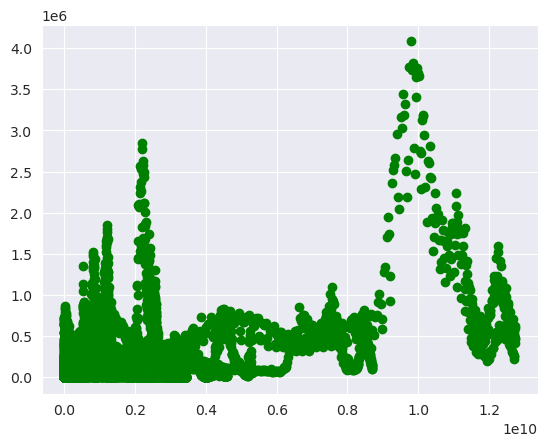

In [21]:
vacc = covid.total_vaccinations[covid.total_vaccinations.notna() == True].sort_values()
new_case = covid.new_cases.iloc[vacc.index]
plt.scatter(vacc, new_case, c ="green")
plt.show()

In [22]:
# ожидали увидеть антикорреляцию, но не всех точках данные коррелируют

###### Выделим топ 10 стран по наименьшему кол-ву смертей и посмотрим как у них дела в вакцинацией.

In [32]:
covid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2/24/2020,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2/25/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2/26/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2/27/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2/28/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [116]:
deaths_per_country = covid.groupby(["location"]).total_deaths.agg(["count"]).reset_index().sort_values(("count"), ascending = True)

In [117]:
location_low_deaths = deaths_per_country[deaths_per_country['count'] >  0]['location'].head(n=12).tolist()    #взяли страны с самым маленьким кол-ом общих смертей (с нулем не учитывали)

In [118]:
location_low_deaths

['Marshall Islands',
 'Micronesia (country)',
 'Macao',
 'Nauru',
 'North Korea',
 'Cook Islands',
 'Samoa',
 'Tonga',
 'Palau',
 'Kiribati',
 'Saint Pierre and Miquelon',
 'Solomon Islands']

In [119]:
deaths_per_country = covid.groupby(["location"]).total_deaths.agg(["count"]).reset_index().sort_values(("count"), ascending = False)

In [120]:
location_high_deaths = deaths_per_country['location'].head(n=20).tolist()

In [121]:
location_high_deaths    #есть не страны, а целые континенты, удалим их

['World',
 'Upper middle income',
 'China',
 'Asia',
 'Europe',
 'United Kingdom',
 'High income',
 'Lower middle income',
 'Philippines',
 'Hong Kong',
 'Japan',
 'France',
 'European Union',
 'Taiwan',
 'Iran',
 'International',
 'South Korea',
 'Italy',
 'North America',
 'San Marino']

In [122]:
remove = ['World', 'Europe', 'Lower middle income', 'European Union', 'International', 'North America', 'Upper middle income', 'Asia']
location_high_deaths = [i for i in location_high_deaths if i not in remove]

In [153]:
len(location_high_deaths)

12

In [154]:
sel_df = covid[covid.location.isin(location_high_deaths+location_low_deaths)]

In [155]:
def type_deaths(row):
    if row.location in location_high_deaths:
        return 'High deaths'
    else:
        return 'low deaths'


In [156]:
sel_df['type_country'] = sel_df.apply(type_deaths, axis = 1)

/tmp/ipykernel_240840/1161257949.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel_df['type_country'] = sel_df.apply(type_deaths, axis = 1)


In [164]:
sel_df = sel_df[sel_df['people_fully_vaccinated_per_hundred'].isna() == False]

In [166]:
sel_df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,type_country
41085,CHN,Asia,China,8/12/2021,104856.0,136.0,126.286,4636.0,0.0,0.000,...,48.4,NaN,4.34,76.91,0.761,NaN,NaN,NaN,NaN,High deaths
41099,CHN,Asia,China,8/26/2021,105571.0,47.0,41.429,4636.0,0.0,0.000,...,48.4,NaN,4.34,76.91,0.761,NaN,NaN,NaN,NaN,High deaths
41110,CHN,Asia,China,9/6/2021,106037.0,49.0,41.571,4636.0,0.0,0.000,...,48.4,NaN,4.34,76.91,0.761,NaN,NaN,NaN,NaN,High deaths
41119,CHN,Asia,China,9/15/2021,106596.0,83.0,70.571,4636.0,0.0,0.000,...,48.4,NaN,4.34,76.91,0.761,NaN,NaN,NaN,NaN,High deaths
41122,CHN,Asia,China,9/18/2021,106818.0,75.0,83.714,4636.0,0.0,0.000,...,48.4,NaN,4.34,76.91,0.761,NaN,NaN,NaN,NaN,High deaths
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207672,GBR,Europe,United Kingdom,8/31/2022,23521796.0,28917.0,8715.000,206579.0,60.0,48.429,...,24.7,NaN,2.54,81.32,0.932,NaN,NaN,NaN,NaN,High deaths
207673,GBR,Europe,United Kingdom,9/1/2022,23521796.0,0.0,4131.000,206614.0,35.0,47.000,...,24.7,NaN,2.54,81.32,0.932,NaN,NaN,NaN,NaN,High deaths
207674,GBR,Europe,United Kingdom,9/2/2022,23521796.0,0.0,4131.000,206652.0,38.0,46.714,...,24.7,NaN,2.54,81.32,0.932,NaN,NaN,NaN,NaN,High deaths
207675,GBR,Europe,United Kingdom,9/3/2022,23521796.0,0.0,4131.000,206652.0,0.0,39.286,...,24.7,NaN,2.54,81.32,0.932,NaN,NaN,NaN,NaN,High deaths


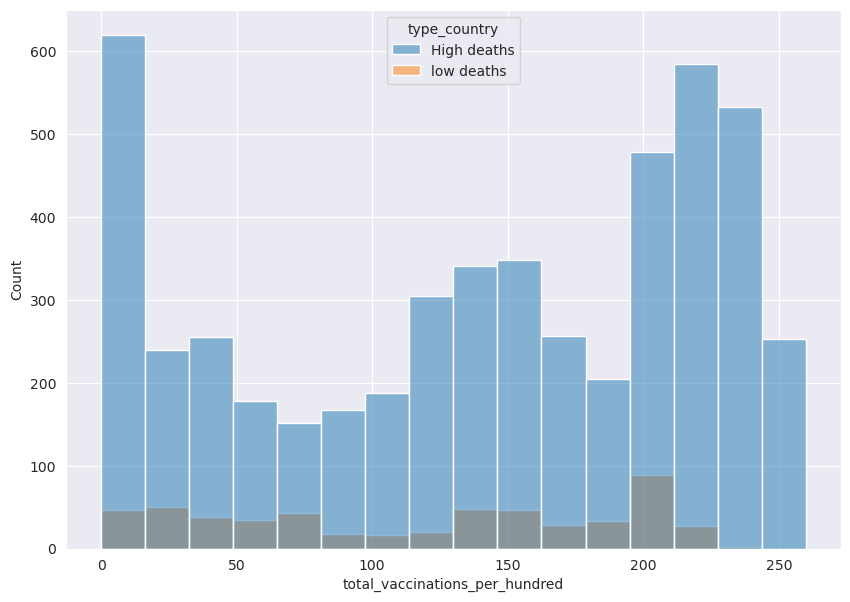

In [168]:
plt.figure(figsize = (10, 7))
ax = sns.histplot(data=sel_df, x='total_vaccinations_per_hundred', hue = 'type_country')

Да, непонятная картина, в странах с большим кол-вом смертей больше частота вакцинированных на 100 человек тоже больше , значит картина сложнее

In [177]:
covid.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

######    влияние частоты случаев на частоту смертей

In [205]:
def func(x):
    if x == True:
        return 'Older'
    else:
        return 'Younger'

In [206]:
bool_ser = covid['aged_70_older'] > covid.aged_70_older.median()

In [207]:
bool_ser.map(func)

0         Younger
1         Younger
2         Younger
3         Younger
4         Younger
           ...   
220338    Younger
220339    Younger
220340    Younger
220341    Younger
220342    Younger
Name: aged_70_older, Length: 220343, dtype: object

In [209]:
new_df = covid

In [210]:
new_df['age'] = bool_ser.map(func)

<AxesSubplot:xlabel='total_cases', ylabel='total_deaths'>

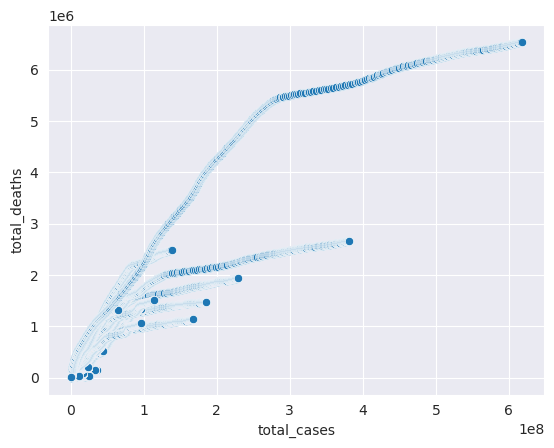

In [211]:
sns.scatterplot(x=new_df['total_cases'], y=new_df['total_deaths'])

##### прослеживается  положительная корреляция, что наверное логично - большее кол-во случаев порадения провоцирует больше смертей

<AxesSubplot:xlabel='people_fully_vaccinated_per_hundred', ylabel='new_cases'>

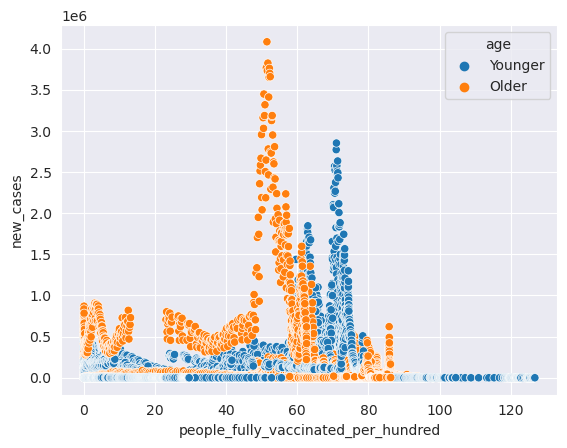

In [213]:
sns.scatterplot(x=new_df['people_fully_vaccinated_per_hundred'], y=new_df['new_cases'], hue = new_df['age'])

##### видно что у пожилых  людей больше новых случаев , при меньшем кол-ве полностью вакцинированных людей

##### посмотрим на влияние кол-ва понлностью вакц людей на кол-во новых смертей

<AxesSubplot:xlabel='people_fully_vaccinated_per_hundred', ylabel='new_deaths'>

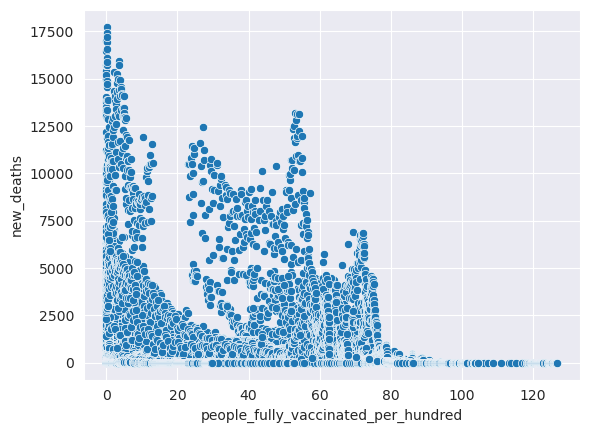

In [218]:
sns.scatterplot(x=new_df['people_fully_vaccinated_per_hundred'], y=new_df['new_deaths'])

###### Видна антикорреляция, видимо как-то кол-во полностью вакцинированных людей предотвращает кол-во новых смертей

<AxesSubplot:xlabel='people_fully_vaccinated_per_hundred', ylabel='new_deaths'>

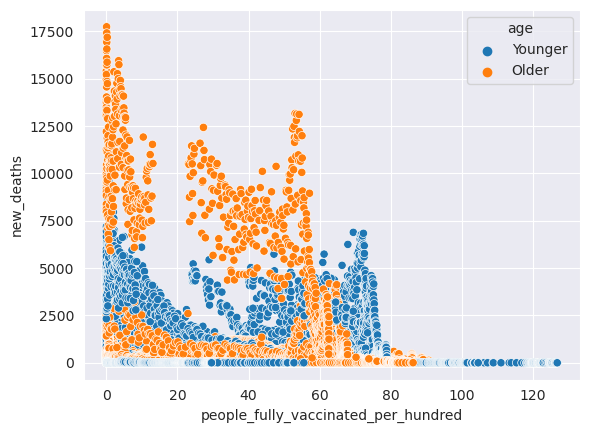

In [219]:
sns.scatterplot(x=new_df['people_fully_vaccinated_per_hundred'], y=new_df['new_deaths'], hue = new_df['age'])

##### видно что у пожилых  людей больше смертей, при меньшем кол-ве полностью вакцинированных людей

### Violin plot

In [101]:
path_data = "./diffexpr_data.tsv"

In [102]:
diff_expr = pd.read_csv(path_data, sep ="\t")

In [103]:
diff_expr.head()

,Sample,logFC,pval,pval_corr,log_pval
0,PNLIP,10.092524,0.659033,1.0,-0.0
1,CELA2A,8.691414,0.582390,1.0,-0.0
2,CLPS,8.054078,0.651733,1.0,-0.0
3,MPO,7.817773,0.448334,1.0,-0.0
4,AMY2A,7.285231,0.632441,1.0,-0.0


0.0506099933550872

КАкой выбрать порог ошибки первого рода (альфа) после поправки?
-np.log10(0.89) - примерно 0.05


In [153]:
treshold_pval = -np.log10(0.89)
treshold_logFC = 0
stats = []
for log_VC, pval in zip(diff_expr.logFC, diff_expr.pval):
    if log_VC >= treshold_logFC and pval < treshold_pval:
        stats.append('Significantly upregulated')
    elif log_VC < treshold_logFC and pval < treshold_pval:
        stats.append('Significantly downregulated')
    elif log_VC < treshold_logFC and pval >= treshold_pval:
        stats.append('None-significantly downregulated')
    elif log_VC >= treshold_logFC and pval >= treshold_pval:
        stats.append('None-significantly upregulated')


In [287]:
diff_expr['stat'] = pd.Series(stats)

In [ ]:
def func(row):
    if row == True

In [136]:
idx = np.where(diff_expr['logFC'] < 0)[0]

In [138]:
diff_expr['logFC'].iloc[idx].min()

-10.661092815248146

In [155]:
diff_expr['stat'].unique()

array(['None-significantly upregulated', 'Significantly upregulated',
       'None-significantly downregulated', 'Significantly downregulated'],
      dtype=object)

In [120]:
diff_expr['stat'].value_counts()

Significantly upregulated           6518
None-significantly upregulated      5980
Significantly downregulated         5191
None-significantly downregulated    2841
Name: stat, dtype: int64

In [93]:
diff_expr['pval'].min()

1.7595729029717564e-118

In [68]:
diff_expr['pval'] <= 1.3

0        True
1        True
2        True
3        True
4        True
         ... 
20525    True
20526    True
20527    True
20528    True
20529    True
Name: pval, Length: 20530, dtype: bool

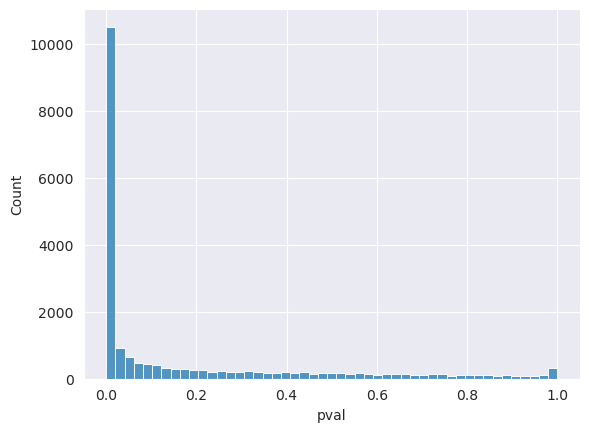

In [62]:
sns.histplot(diff_expr['pval']);

In [55]:
np.log10(0.05)

-1.3010299956639813

In [51]:
diff_expr['stat'][diff_expr['stat'] == 'None-significantly downregulated'].index

Int64Index([12498, 12499, 12500, 12501, 12502, 12503, 12504, 12505, 12506,
            12507,
            ...
            19652, 19719, 19722, 19874, 19910, 19962, 20017, 20030, 20169,
            20228],
           dtype='int64', length=2847)

In [54]:
diff_expr['pval'][diff_expr['stat'] == 'Significantly downregulated']

12766    3.849463e-07
12828    1.738094e-02
13124    4.542982e-02
13295    2.042494e-03
13561    4.001845e-02
             ...     
20525    4.993254e-58
20526    3.989840e-04
20527    3.281804e-07
20528    3.880575e-04
20529    3.717350e-57
Name: pval, Length: 5185, dtype: float64

In [53]:
diff_expr['pval'][diff_expr['stat'] == 'None-significantly downregulated']

12498    0.999984
12499    0.999485
12500    0.999100
12501    0.998774
12502    0.983089
           ...   
19962    0.268940
20017    0.114961
20030    0.060437
20169    0.052609
20228    0.080615
Name: pval, Length: 2847, dtype: float64

In [95]:
diff_expr.head()

,Sample,logFC,pval,pval_corr,log_pval,stat
0,PNLIP,10.092524,0.659033,1.0,-0.0,Significantly upregulated
1,CELA2A,8.691414,0.582390,1.0,-0.0,Significantly upregulated
2,CLPS,8.054078,0.651733,1.0,-0.0,Significantly upregulated
3,MPO,7.817773,0.448334,1.0,-0.0,Significantly upregulated
4,AMY2A,7.285231,0.632441,1.0,-0.0,Significantly upregulated


In [ ]:
top_signific_downregul = diff_expr[diff_expr['stat'] == 'Significantly downregulated'].sort_values(['logFC']).head(n=2)[['Sample', 'logFC', 'pval']]
top_signific_upregul = diff_expr[diff_expr['stat'] == 'Significantly upregulated'].sort_values(['logFC'], ascending=False).head(n=2)[['Sample', 'logFC', 'pval']]
df_merged = top_signific_upregul.append(top_signific_downregul, ignore_index=True)
gene_1, gene_2, gene_3, gene_4 = df_merged.Sample.tolist()
x1, x2, x3, x4 = df_merged.logFC.tolist()
y1, y2, y3, y4 = df_merged.pval.tolist()

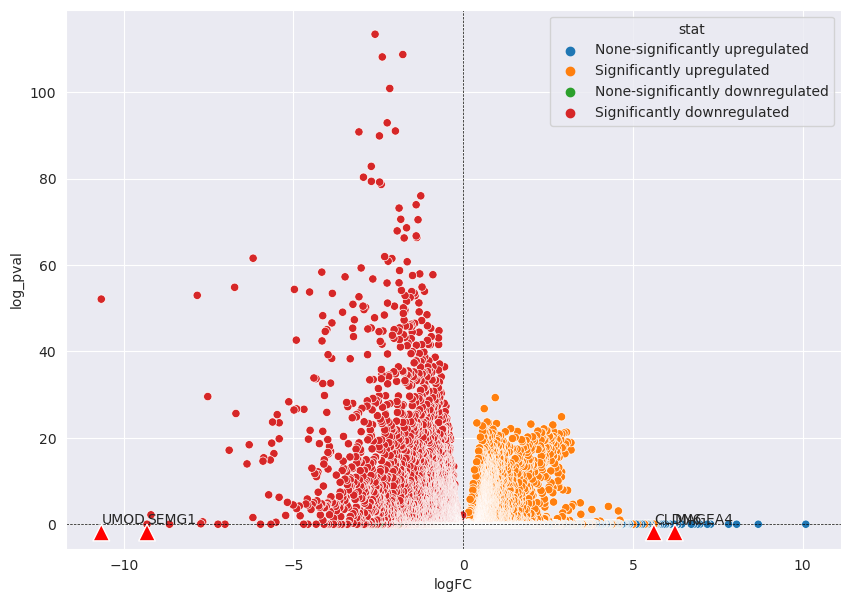

In [284]:
plt.figure(figsize = (10, 7))
ax = sns.scatterplot(data = diff_expr, x ='logFC', y ='log_pval', hue = 'stat', sizes=(0.5, 100))
ax.axvline(0, c = 'k', lw = 0.5, ls = '--')
ax.axhline(-np.log10(0.89), c = 'k', lw = 0.5, ls = '--')
plt.annotate(text = gene_1, xy = (x1, y1), xytext=(x1, y1), arrowprops =dict(facecolor='red'))
plt.annotate(text = gene_2, xy = (x2, y2), xytext=(x2, y2), arrowprops =dict(facecolor='red'))
plt.annotate(text = gene_3, xy = (x3, y3), xytext=(x3, y3), arrowprops =dict(facecolor='red'))
plt.annotate(text = gene_4, xy = (x4, y4), xytext=(x4, y4), arrowprops =dict(facecolor='red'))

plt.show()

я не очень понимаю почему я не вижу none-significantly точки, почему не сохраняется масштаб относительно порога альфа который я задал
